# **Title of Project**

-------------

## **Objective**

Goal: The primary objective is to predict which customers are at risk of churning so that the bank can take proactive measures to retain them.
Business Impact: By identifying at-risk customers, the bank can:
Offer personalized retention strategies (e.g., discounts, loyalty rewards).
Improve customer service for high-value customers.
Reduce overall churn rates, thereby increasing revenue and customer lifetime value.

## **Data Source**

ybi/foundation github repository

## **Import Library**

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


## **Import Data**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

## **Describe Data**

In [8]:
df.describe()
df.info()
df.head()
df.duplicated(['CustomerId']).sum()
df=df.set_index('CustomerId')
df.info()





<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


KeyError: Index(['CustomerId'], dtype='object')

## **Data Visualization**

In [9]:
df['Geography'].value_counts()
df.replace({'Geography':{'France':0,'Spain':1,'Germany':2}},inplace=True)
df['Gender'].value_counts()
df.replace({'Gender':{'Female':0,'Male':1}},inplace=True)
df['Num Of Products'].value_counts()
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)
df['Has Credit Card'].value_counts()
df['Is Active Member'].value_counts()
df.loc[(df['Balance']==0),'Churn'].value_counts()
df['Zero Balance']=np.where(df['Balance']>0,1,0)



C:\Users\dell\AppData\Local\Temp\ipykernel_6616\338494102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':0,'Spain':1,'Germany':2}},inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_6616\338494102.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':0,'Male':1}},inplace=True)


## **Data Preprocessing**

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             2064         2064    2064  2064    2064     2064   
      2             1695         1695    1695  1695    1695     1695   
1     0              810          810     810   810     810      810   
      1              413          413     413   413     413      413   
      2              814          814     814   814     814      814   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     2064             2064              2064   
      2                     1695             1695              1695   
1     0                      810              810               810   
      1                      413              413               413   
      2                      814              814               814   

                 Estimated Salary  Zero Balance  zero Balance  
Churn Geography                                                
0     0                      4204          4204          4204  
      1                      2064          2064          2064  
      2                      1695          1695          1695  
1     0                       810           810           810  
      1                       413           413           413  
      2                       814           814           814

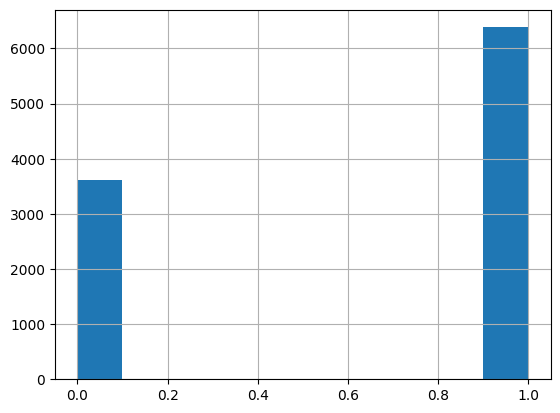

In [10]:
df['zero Balance']=np.where(df['Balance']>0,1,0)
df['zero Balance'].hist()
df.groupby(['Churn','Geography']).count()

## **Define Target Variable (y) and Feature Variables (X)**

<Axes: ylabel='Frequency'>

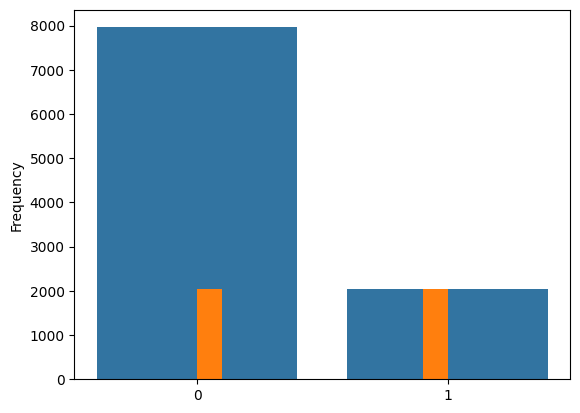

In [34]:
df.columns
X = df.drop(['Surname', 'Churn'], axis=1)
y = df['Churn']
X.shape,y.shape
#Handling Imbalance Data
df['Churn'].value_counts() 
sns.countplot(x='Churn', data=df);
X.shape,y.shape
#Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=2529)
X_rus, y_rus =rus.fit_resample(X,y)
X_rus.shape, y_rus.shape ,X.shape,y.shape
y.value_counts
y_rus.value_counts()
y_rus.plot(kind='hist')
#Random over sampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2529)
X_ros,y_ros=ros.fit_resample(X,y)
X_ros.shape,y_ros.shape,X.shape,y.shape
y.value_counts()
y_rus.plot(kind='hist')


## **Train Test Split**

In [50]:
from sklearn.model_selection import train_test_split
#Split orignal data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)
#Split random under sampling
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3,random_state=2529)
#Split random over sampling
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)
#standrize feature
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
#Standrize orignala data
X_train[['creditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test[['creditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
#Standrize under sampling
X_train_rus[['creditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['creditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
#Standrize over sampling
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])




## **Modeling**

In [51]:
#Vector classifier
from sklearn.svm import  SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

## **Model Evaluation**

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)
#model with random under sampling
svc_rus=SVC()
svc_rus.fit(X_train_rus,y_train_rus)
y_pred_rus= svc_rus.predict(X_test_rus)
#model Acurracy
confusion_matrix(y_test_rus,y_pred_rus)
print(classification_report(y_test_rus,y_pred_rus))


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ....C=1, class_weight=balanced, gam

SVC()

## **Prediction**

In [69]:
#hyperparameter tunning
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)
print(grid_rus.best_estimator_)
grid_predictions_rus=grid_rus.predict(X_test_rus)
confusion_matrix(y_test,grid_predictions_rus)
print(classification_report(y_test_rus,grid_predictions_rus))
#model with random over sampling
svc_ros=SVC()
svc_ros.fit(X_train_ros,y_train_ros)
y_pred_ros= svc_ros.predict(X_test_ros)
#model Acurracy
confusion_matrix(y_test_ros,y_pred_ros)
print(classification_report(y_test_ros,y_pred_ros))
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)
grid_ros.fit(X_train_ros,y_train_ros)
print(grid_ros.best_estimator_)
print(calssification_report(y_test,y_pred))



Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

ValueError: Found input variables with inconsistent numbers of samples: [3000, 1223]

## **Explaination**



Explanation of the Code:
Data Loading: The dataset is loaded using pandas.
Feature Selection: Relevant features for churn prediction are selected.
Train-Test Split: The data is split into training and testing sets to evaluate model performance.
Feature Scaling: Features are scaled to ensure that the model treats all features equally.
Model Training: A logistic regression model is trained on the training data.
Predictions & Evaluation: The model makes predictions on the test set, and various metrics are calculated to evaluate its performance.
This code provides a basic structure for building and evaluating a churn prediction model. In practice, you may want to explore different models, fine-tune hyperparameters, and use more advanced techniques to improve performance.